In [30]:
#load the model
model = load_model('model.h5')

(1, 500, 500, 3)

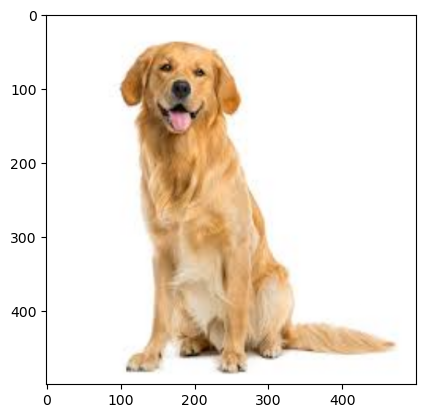

In [50]:
# load and resize this image : photo_chien.jpeg using matplotlib
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np


img = plt.imread('téléchargé.jpeg')
img = resize(img, (500,500))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
img.shape

In [52]:
def plot_activation(activation, plot_height, plot_width):
   ix = 1
   for _ in range(plot_height):
       for _ in range(plot_width):
           # specify subplot and turn of axis
           ax = plt.subplot(plot_height, plot_width, ix)
           ax.set_xticks([])
           ax.set_yticks([])
           # plot filter channel in grayscale
           plt.imshow(activation[0, :, :, ix - 1], cmap='gray')
           ix += 1
   # show the figure
   plt.show()

In [54]:
my_image = img

In [57]:
print(len(activations))

11


1/1 [==============================] - 0s 70ms/step


IndexError: index 20 is out of bounds for axis 3 with size 20

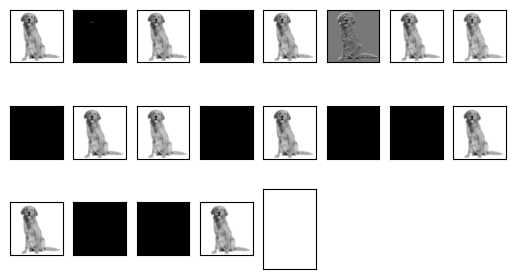

In [66]:
from tensorflow.keras import models
# Extracts the outputs of the top 12 layers
layer_outputs = [layer.output for layer in model.layers[:12]]
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(my_image)
# plot the first activation layer (4x8 => 32 filters or activations)
#for i in range(len(activations)):
    #plot_activation(activations[i], 4, 8)
plot_activation(activations[3], 4, 8)


In [56]:
def plot_neuron(neuron, number):
   ix = 1
   vmin = min(neuron[0, :number])
   vmax = max(neuron[0, :number])
   for _ in range(number):
       # specify subplot and turn of axis
       ax = plt.subplot(1, number, ix)
       ax.set_xticks([])
       ax.set_yticks([])
       # plot filter channel in grayscale
       plt.imshow([neuron[:, ix - 1]], cmap="gray", vmin=vmin, vmax=vmax)
       ix += 1
   plt.show()